# CSE 860 Hw1
Haitian Yan(A53001564)

## Q1 Iris dataset

### (a)

In [ ]:
import numpy as np
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Determine the unique classes in the target
classes = np.unique(y)

# Initialize a list to store the mean pattern vectors
mean_patterns = []

# Compute the mean pattern vector for each class
for class_label in classes:
    X_class = X[y == class_label]
    mean_pattern = np.mean(X_class, axis=0)
    mean_patterns.append(mean_pattern)

# Convert the list to a numpy array
mean_patterns = np.array(mean_patterns)
mean_patterns

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

### (b)

In [ ]:
# Convert the list to a numpy array
mean_patterns = np.array(mean_patterns)

# Initialize a list to store the farthest patterns
farthest_patterns = []

# Determine the farthest pattern for each class
for class_label in classes:
    X_class = X[y == class_label]
    mean_pattern = mean_patterns[class_label]
    distances = np.linalg.norm(X_class - mean_pattern, axis=1)
    farthest_index = np.argmax(distances)
    farthest_pattern = X_class[farthest_index]
    farthest_patterns.append(farthest_pattern)

# Convert the list to a numpy array
farthest_patterns = np.array(farthest_patterns)
farthest_patterns

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.5, 4.5, 1.7]])

### (c)

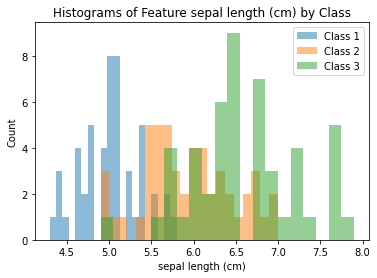

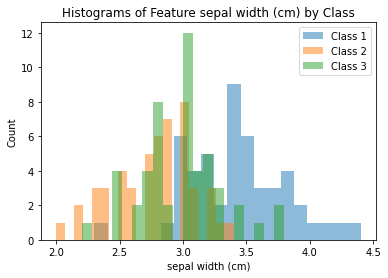

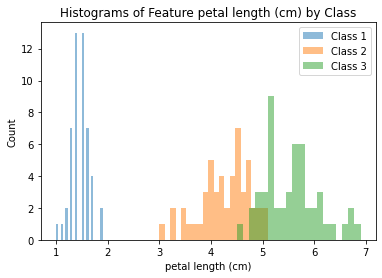

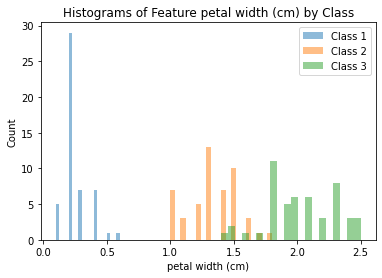

In [ ]:
import matplotlib.pyplot as plt
# Plot the histograms for each feature and class
for feature_idx in range(X.shape[1]):
    plt.figure()
    for class_label in classes:
        X_class = X[y == class_label, feature_idx]
        plt.hist(X_class, bins=20, alpha=0.5, label=f"Class {class_label + 1}")
    plt.xlabel(iris.feature_names[feature_idx])
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Histograms of Feature {iris.feature_names[feature_idx]} by Class")

plt.show()

**Answer to (a):** The `petal length` and `petal width` are features likely to distinguish the 3 classes. Because the distribution of three classes on these features have fewest overlapping.<br>
**Answer to (b):** The `versicolor(class 2)` and `virginica(class 3)` are likey to overlap because in all 4 graph they are overlapping in different degrees.

### (d)

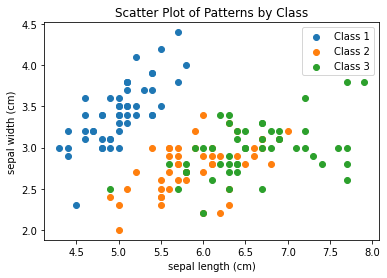

In [ ]:
# Plot the scatter plot for features 1 and 2
for class_label in classes:
    X_class = X[y == class_label, :]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f"Class {class_label + 1}")

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title("Scatter Plot of Patterns by Class")
plt.show()

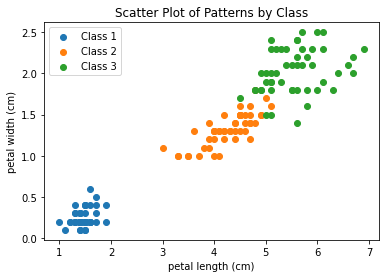

In [ ]:
# Plot the scatter plot for features 3 and 4
for class_label in classes:
    X_class = X[y == class_label, :]
    plt.scatter(X_class[:, 2], X_class[:, 3], label=f"Class {class_label + 1}")

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.title("Scatter Plot of Patterns by Class")
plt.show()

**Answer:** The {x3, x4} features are more likely to be useful for separating the 3 classes because first there is a linear pattern and classes are distributed within different linear ranges. For example class 1 are mainly inside x3 < 0.2 and x4 < 0.7 range, class 2 are mainly distributed in x3 in [2.5, 5] and x4 in [1.0, 1.7].

### (e)

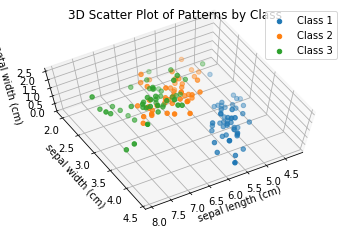

In [ ]:
# Plot the scatter plot for features 1, 2, and 4
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for class_label in classes:
    X_class = X[y == class_label, :]
    ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, -1], label=f"Class {class_label + 1}")
ax.view_init(azim=60, elev=70)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[3])
plt.legend()
plt.title("3D Scatter Plot of Patterns by Class")
plt.show()

**Answer:** Class 2 and 3 are overlapping to a great extent because the scatter dots are mixed up. There is nearly no overlapping in class 1

### (f)
**Answer:** We could build machine learning models to classify two classes, and count the number of false positive and false negatives as degree of overlap.

## 2.
(a) **Generalization:** Generalization is the ability of a model to recognize patterns in new, unseen data based on its training on similar data.
Example: A model trained to recognize different breeds of dogs can generalize to recognize a new breed of dog it has never seen before.<br>
(b) **Intra-class variation:** Refers to the variations within a class or group of data points, indicating that members of a class are not identical.
Example: Handwritten digits 0-9 having different shapes and styles written by different individuals.<br>
(c) **Decision Boundary**: Refers to the separating line or surface between two classes in a multi-class classification problem.
Example: A line separating apples and bananas in a 2D space based on their weight and color features.<br>
(d) **Reinforcement learning**: A type of machine learning where an agent learns to perform an action through trial and error interactions with an environment to maximize a reward signal.
Example: A robot learning to navigate to a target while avoiding obstacles through positive reinforcement when reaching the target and negative reinforcement when hitting an obstacle.<br>
(e) **Invariant representation**: Refers to a feature representation that is robust to variations in the data such as translations, rotations, and scalings.
Example: Using HOG (Histogram of Oriented Gradients) features for object recognition that are invariant to object size and orientation.

## 3.
(a) 
* Sensor used: It required a single leaf specimen is photographed on a solid light-colored background.
* Segmentation method: They do this by estimating foreground and background color distributions in the saturation-value space of the HSV colorspace.
* Features extracted: Curvature features from the binarized image for compactly and discriminatively representing the shape of the leaf. They robustly compute histograms of curvature over multiple scales using integral measures of curvature.
* Classification model: Support Vector Machine (SVM) with an RBF kernel
* How many features (i.e., d) and classes (i.e., c) are present? There are 525 features and 184 classes present in the dataset.

(b) They train the model by using gist features computed on the image,
then fed into a Support Vector Machine (SVM) with an RBF kernel as the classification function. The classifier is trained with 5,972 manually labeled data with 184 categories.<br>
(c)<br> They evaluate the performances by perform leave-oneimage-out species identification, using only the field images as queries, matching against all other images in the recognition database. The metrics they use is defined as the rank of the correct species.<br>
(d) Their performance is good. Because a 96.8% of queries have a species match rank of 5 or lower with their method is already impressive. However, the dataset size is still relatively small, althought this is understandable because of the limited resources and human experts.<br>

## 4.
(a). This is reinforcement learning because the chess game has extremely large number of possible states, a computer can learn chess through trail and errors.<br>
(b). This is unsupervised because we do not have a Encyclopedia to know the species of shells.<br>
(c). This is supervised learning because the make and models are already existed categories.<br>
(d). This is supervised learning because the possible weather is a category, and the weather conditions are the features.<br>
(e). This is unsupervised learning because there is no given category for each kind of patches.

## 5.

### (a)

In [ ]:
import pandas as pd
df = pd.read_csv("./patterns_labels.txt", sep=" ", header=None)
df.columns = ["0","1","2"]
df

,0,1,2
0,3.84,10.03,1
1,7.48,6.33,1
2,1.64,2.96,1
3,4.01,3.85,1
4,6.51,5.67,1
...,...,...,...
195,11.14,8.71,2
196,10.84,10.88,2
197,8.76,8.63,2
198,11.20,11.38,2


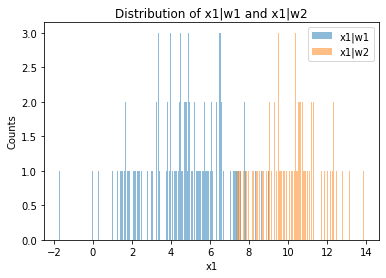

In [ ]:
plt.figure()
plt.hist(df[df["2"]==1].iloc[:,0], bins=df.shape[0], alpha=0.5, label="x1|w1")
plt.hist(df[df["2"]==2].iloc[:,0], bins=df.shape[0], alpha=0.5, label="x1|w2")
plt.xlabel("x1")
plt.ylabel("Counts")
plt.title("Distribution of x1|w1 and x1|w2")
plt.legend()
plt.show()

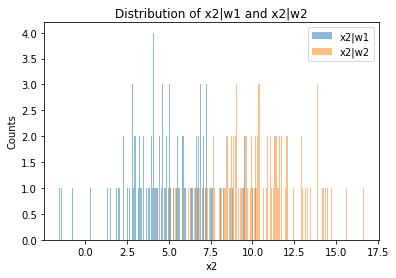

In [ ]:
plt.figure()
plt.hist(df[df["2"]==1].iloc[:,1], bins=df.shape[0], alpha=0.5, label="x2|w1")
plt.hist(df[df["2"]==2].iloc[:,1], bins=df.shape[0], alpha=0.5, label="x2|w2")
plt.xlabel("x2")
plt.ylabel("Counts")
plt.title("Distribution of x2|w1 and x2|w2")
plt.legend()
plt.show()

### (b)

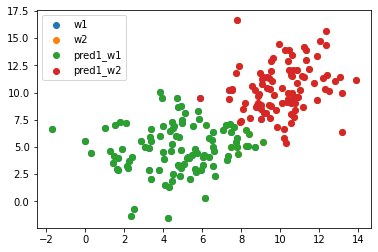

Error Rate: 5.000000%


In [ ]:
y_pred = df.apply(lambda row:1 if row["0"] + row["1"] - 15 < 0 else 2, axis=1)
df["rule_pred1"] = y_pred
plt.figure()
plt.scatter(df[df["2"]==1]["0"], df[df["2"]==1]["1"], label="w1")
plt.scatter(df[df["2"]==2]["0"], df[df["2"]==2]["1"], label="w2")
plt.scatter(df[df["rule_pred1"]==1]["0"], df[df["rule_pred1"]==1]["1"], label="pred1_w1")
plt.scatter(df[df["rule_pred1"]==2]["0"], df[df["rule_pred1"]==2]["1"], label="pred1_w2")
plt.legend()
plt.show()
error_rate = df[df["rule_pred1"] != df["2"]].shape[0] / df.shape[0]
print(f"Error Rate: {error_rate:%}")

### (c)

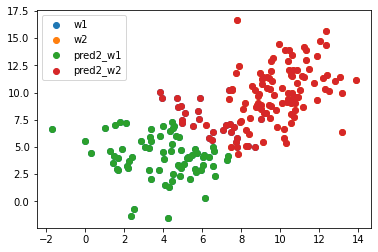

Error Rate: 13.500000%


In [ ]:
y_pred = df.apply(lambda row:1 if row["0"] + row["1"] - 12 < 0 else 2, axis=1)
df["rule_pred2"] = y_pred
plt.figure()
plt.scatter(df[df["2"]==1]["0"], df[df["2"]==1]["1"], label="w1")
plt.scatter(df[df["2"]==2]["0"], df[df["2"]==2]["1"], label="w2")
plt.scatter(df[df["rule_pred2"]==1]["0"], df[df["rule_pred2"]==1]["1"], label="pred2_w1")
plt.scatter(df[df["rule_pred2"]==2]["0"], df[df["rule_pred2"]==2]["1"], label="pred2_w2")
plt.legend()
plt.show()
error_rate = df[df["rule_pred2"] != df["2"]].shape[0] / df.shape[0]
print(f"Error Rate: {error_rate:%}")

### (d)
**Answer:** The former classifier has performed well on this dataset. Because it has a less error rate.